# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [47]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)


### Load the dataset

Load the cleaned dataset.

In [9]:
wnba=pd.read_csv('/Users/sandrine/Desktop/Prework/806_Repo/Labs/module_2/M2-mini-project2/data/wnba_clean.csv')

In [10]:
wnba.head()

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [11]:
"""Sample must be reprensentative of the whole population of professional female basketball player in the world. The selection of the sample should be randomized in order to avoid sampling bias
In theory it would be great to have samples from other league. WNBA has players coming from all around the world so it
should be representative in a certain way"""

'Sample must be reprensentative of the whole population of professional female basketball player in the world. The selection of the sample should be randomized in order to avoid sampling bias\nIn theory it would be great to have samples from other league. WNBA has players coming from all around the world so it\nshould be representative in a certain way'

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [12]:

#Method 1
conf_int95 = stats.norm.interval(0.95, loc=wnba.Weight.mean(), scale=np.std(wnba.Weight) /np.sqrt(wnba.Weight.size))


confidence = 0.95
data = wnba.Weight

n = wnba.Weight.size
m =wnba.Weight.mean()
std_err = stats.sem(wnba.Weight)
h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)

start = m - h
end = m + h
#Method 2
conf_interval=[m - h,m + h]

conf_interval,conf_int95 

([77.15461406720749, 80.80313241166576],
 (77.17665079176093, 80.78109568711231))

**What can you say about these results?**

In [13]:
"""the probability of the mean of the population of professionnal players is within the above interval by 95%"""

'the probability of the mean of the population of professionnal players is within the above interval by 95%'

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [35]:
#your-answer-here
#H0: mean is closed to 67
#H1: mean is significantly different from 67
stat,pvalue = ttest_1samp(wnba.Weight,67)
print(f'stat {stat}')
print(f'pvalue {pvalue}')
#67 kg is significantly different from the average.
#she is right statistically there are few changes for my sister to be professional player if we look to the weight.

stat 12.981385575989544
pvalue 7.635325397241363e-26


## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

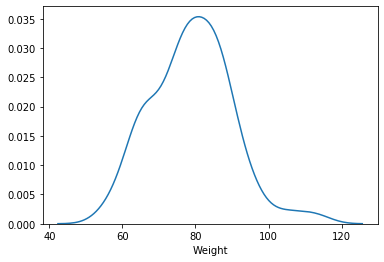

In [49]:

sns.distplot(wnba.Weight,hist=False)


# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [16]:
#requirement both np0 and n(1-p0) are greater than five.
wnba[['FTM','FTA','FT%']]
#FT% is the % of success (FTM/FTA*100)

,FTM,FTA,FT%
0,21,26,80.8
1,32,41,78.0
2,35,42,83.3
3,17,21,81.0
4,11,12,91.7
...,...,...,...
137,136,161,84.5
138,4,6,66.7
139,94,102,92.2
140,110,135,81.5


In [17]:
"""we consider that each player who miss more than 40% of free throw as a success. 
Create a new column more40 with 1 when a player miss more than 40% of free throw and 0 else. """

wnba['more40']=wnba['FT%'].map(lambda x:1 if x<60 else 0)

wnba.head()

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,more40
0,0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0,0
1,1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0,0
2,2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0,0
3,3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0,0
4,4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0,0


In [40]:
#calculate of the sample proportion
# Z=1.96 for 95% confidence
Z=1.96
phat=wnba.more40.sum()/wnba.shape[0]
print(f'check requirements min is :{min(phat*wnba.shape[0],(1-phat)*wnba.shape[0])}')
#calculate the confidence interval
upperbound=phat+Z*(phat*(1-phat)/wnba.shape[0])**1/2
lowerbound=phat-Z*(phat*(1-phat)/wnba.shape[0])**1/2



check requirements min is :13.999999999999998


**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [32]:
#confidence interval is:
print(lowerbound,lowerbound)

0.09797821246063965 0.09797821246063965


**What can you comment about our result? What would you tell your sister?**

In [15]:
"""Few players miss their free throws. as the proportion is within the interval above"""

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

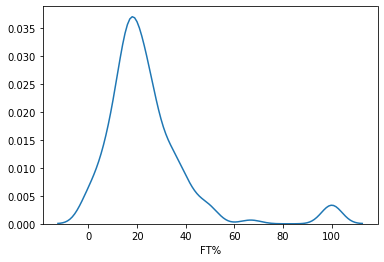

In [52]:

sns.distplot((100-wnba['FT%']),hist=False)

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [16]:
"""
Use hypothesis testing.
Requirements :Our observations must be independent of each other. The sample is derived from a normally distributed
data. The sample size is here greater than 30. 
Assumption : we assume the sample is normally distributed.We do not know the standard deviation of the whole population
so we will use a t-distribution for for the hypothesis test.
The other requirements are satisfied.


**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [28]:

"""Null hypothesis :average assists for female professional players =  52
Alternative hypothesis is H1 : average assists for female professional player !=52"
We will test the null Hypothesis using a two-tailed one-sample t-test"""
stat,pvalue = ttest_1samp(wnba.AST,52)
print(f'stat {stat}')
print(f'pvalue {pvalue}')
"""Pvalue is above 2.5% so Null Hyp cannot be rejected with a 95% confidence interval"""

stat -2.1499947192482898
pvalue 0.033261541354107166


'Pvalue is above 2.5% so Null Hyp cannot be rejected. with a 95% confidence interval'

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [20]:
"""Null hypothesis :average assists for female professional players =  52
Alternative hypothesis is H1 : average assists for female professional player >52 or<52"
We will test the null Hypothesis using a one-sided alternative hypothesis."""

In [29]:
stat,pvalue = ttest_1samp(wnba.AST,52)
print(f'stat {stat}')
print(f'pvalue {pvalue}')
"""Pvalue is below 5% so H0 can be rejected. Stat is negative so observation mean is below 52."""

stat -2.1499947192482898
pvalue 0.033261541354107166


In [ ]:
"""statistically the average assists for female professional players can be lower than the average of both female and male players combined  """

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
"""Use normaltest which tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality."""

In [37]:
k2, p = stats.normaltest(wnba.Weight)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: Weight comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 0.104985
The null hypothesis cannot be rejected


**What are your comments in regards to the results of the test?**

In [24]:
#Hypothesis that Weight comes from a normal distribution cannot be rejected.